# Laboratory 5 - Multivariate Gauessian Density
In this laboratory we will focus on computing probability densities and ML estimates.

The Multivariate Gaussian (MVG) density is defined as:

$$\displaystyle \mathcal{N}(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{(2\pi)^{\frac{M}{2}} |\boldsymbol{\Sigma}|^{\frac{1}{2}}} \exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right)$$

where M is the size of the feature vector x, and |Σ| is the determinant of Σ.
To avoid numerical issues due to exponentiation of large numbers, in many practical cases it’s more
convenient to work with the logarithm of the density

$$
\log \mathcal{N}(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma}) = -\frac{M}{2} \log 2\pi - \frac{1}{2} \log |\boldsymbol{\Sigma}| - \frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})
$$

Write a function to compute the log-density $\texttt{logpdf\_GAU\_ND(x, mu, C)}$ for a sample $\texttt{x}$.
 $\texttt{mu}$ should be a numpy $\texttt{array}$ of shape $\texttt{(M, 1)}$, whereas $\texttt{C}$ is a numpy $\texttt{array}$ of shape $\texttt{(M, M)}$ representing the covariance matrix $\boldsymbol{\Sigma}$.


In [85]:
# Includes:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import sklearn as sk

# utility functions for the project
def vcol(v):
    return np.array(v).reshape(v.size, 1)

def vrow(v):
    return np.array(v).reshape(1, v.size)

In [86]:
def logpdf_GAU_ND(x, mu, C):
    M = C.shape[0] # == C.shape[1] == mu.shape[0] == x.shape[0]
    N = x.shape[1]
    Y = np.zeros(N)  # Initialize Y with size N
    for i in range(N):
        (sign, log_det_C) = np.linalg.slogdet(C)
        x_i = vcol(x[:,i])
        Y[i] = (-M/2*np.log(2*np.pi) - 0.5*log_det_C - 0.5*(x_i-mu).T@linalg.inv(C)@(x_i-mu)).item()
    return vcol(Y)

In the following we assume that logpdf_GAU_ND(X, mu, C) takes as input a data matrix X and returns
a 1-D numpy array of log-densities Y . You can visualize your density

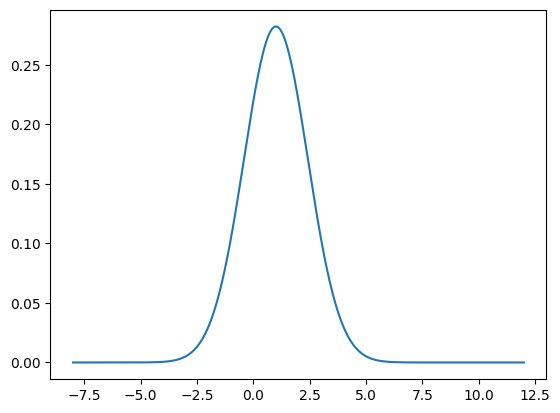

In [90]:
# visualization example

plt.figure()
XPlot = np.linspace(-8, 12, 1000)
m = np.ones((1,1)) * 1.0
C = np.ones((1,1)) * 2.0
plt.plot(XPlot.ravel(), np.exp(logpdf_GAU_ND(vrow(XPlot), m, C)))
plt.show()

In [91]:
# Validation test
pdfSol = np.load('./llGAU.npy')

pdfGau = logpdf_GAU_ND(vrow(XPlot), m, C)
print(np.abs(vcol(pdfSol) - pdfGau).max())

0.0


In [92]:
XND = np.load('./XND.npy')
mu = np.load('./muND.npy')
C = np.load('./CND.npy')
pdfSol = np.load('./llND.npy')
pdfGau = logpdf_GAU_ND(XND, mu, C)
print(np.abs(vcol(pdfSol) - pdfGau).max())

8.881784197001252e-16
